<a href="https://colab.research.google.com/github/sherlyprastica/netflix_data_exploratory/blob/main/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Exploratory Data Analysis
dataset = pd.read_csv("/content/sample_data/netflix_titles.csv")
dataset.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [2]:
dataset.shape

(6234, 12)

In [3]:
dataset.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
dataset.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [6]:
dataset.duplicated().sum()

0

In [7]:
df = dataset.copy()
df.shape

(6234, 12)

In [8]:
df = df.dropna()
df.isnull().sum() #to check whether the NA data is still keep or no

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
list(df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [10]:
df["date_added"] = pd.to_datetime(df["date_added"])
df['year_added'] = df['date_added'].dt.year
df['month_number'] = df['date_added'].dt.month
df['year_added'].astype(int);
df['month_number'].astype(int);

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_number'],
      dtype='object')

In [11]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_number
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2017,9


**DATA VISUALIZATION**

1) How many films and TV series are released by Netflix each year? and how about distribution by type ?

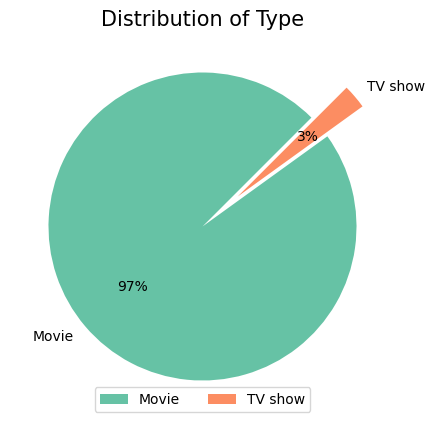

Text(0.5, 1.0, 'Number of Movie/TV Series by Year')

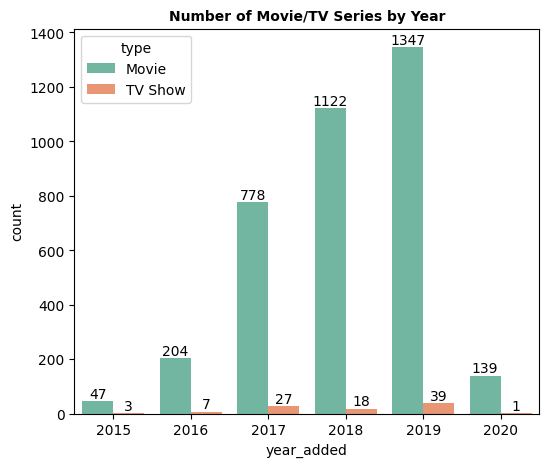

In [12]:
#pie chart
data = df[(df.year_added>=2015)]
labels = ['Movie', 'TV show']
size = data['type'].value_counts()
explode = [0, 0.3]
plt.rcParams['figure.figsize'] = (6, 5)
plt.pie(size, labels=labels, colors = sns.color_palette('Set2'), autopct = '%0.0f%%', explode = explode, startangle = 45)
plt.title('Distribution of Type', fontsize = 15)
plt.legend(loc ="lower center", ncol=2)
plt.show()

#graph 
countplot_type = sns.countplot(x='year_added',hue='type',data=df[(df.year_added>=2015)], palette='Set2')
for container in countplot_type.containers:
    countplot_type.bar_label(container)

countplot_type.set_title('Number of Movie/TV Series by Year', fontdict={'size': 10, 'weight': 'bold', 'multialignment':'center'})




from 2015 to 2020 movie/tv show added on netflix is dominated with Movie. there was an increase in film releases on netflix. but in 2020 there was a drastic decrease about 89.6% in the number of film releases, this was due to being constrained by the covid pandemic. But for the film series type in 2018 there was a not too drastic decrease about 33.3% and in 2019 there was an increase about 101% from the previous year. but there has been a very drastic decrease in 2020 about 97.4% and this is expected to be due to the covid pandemic too

-----------------------------------------------------------------------
2) What Dominated categories (maturity rating) are released by Netflix ?

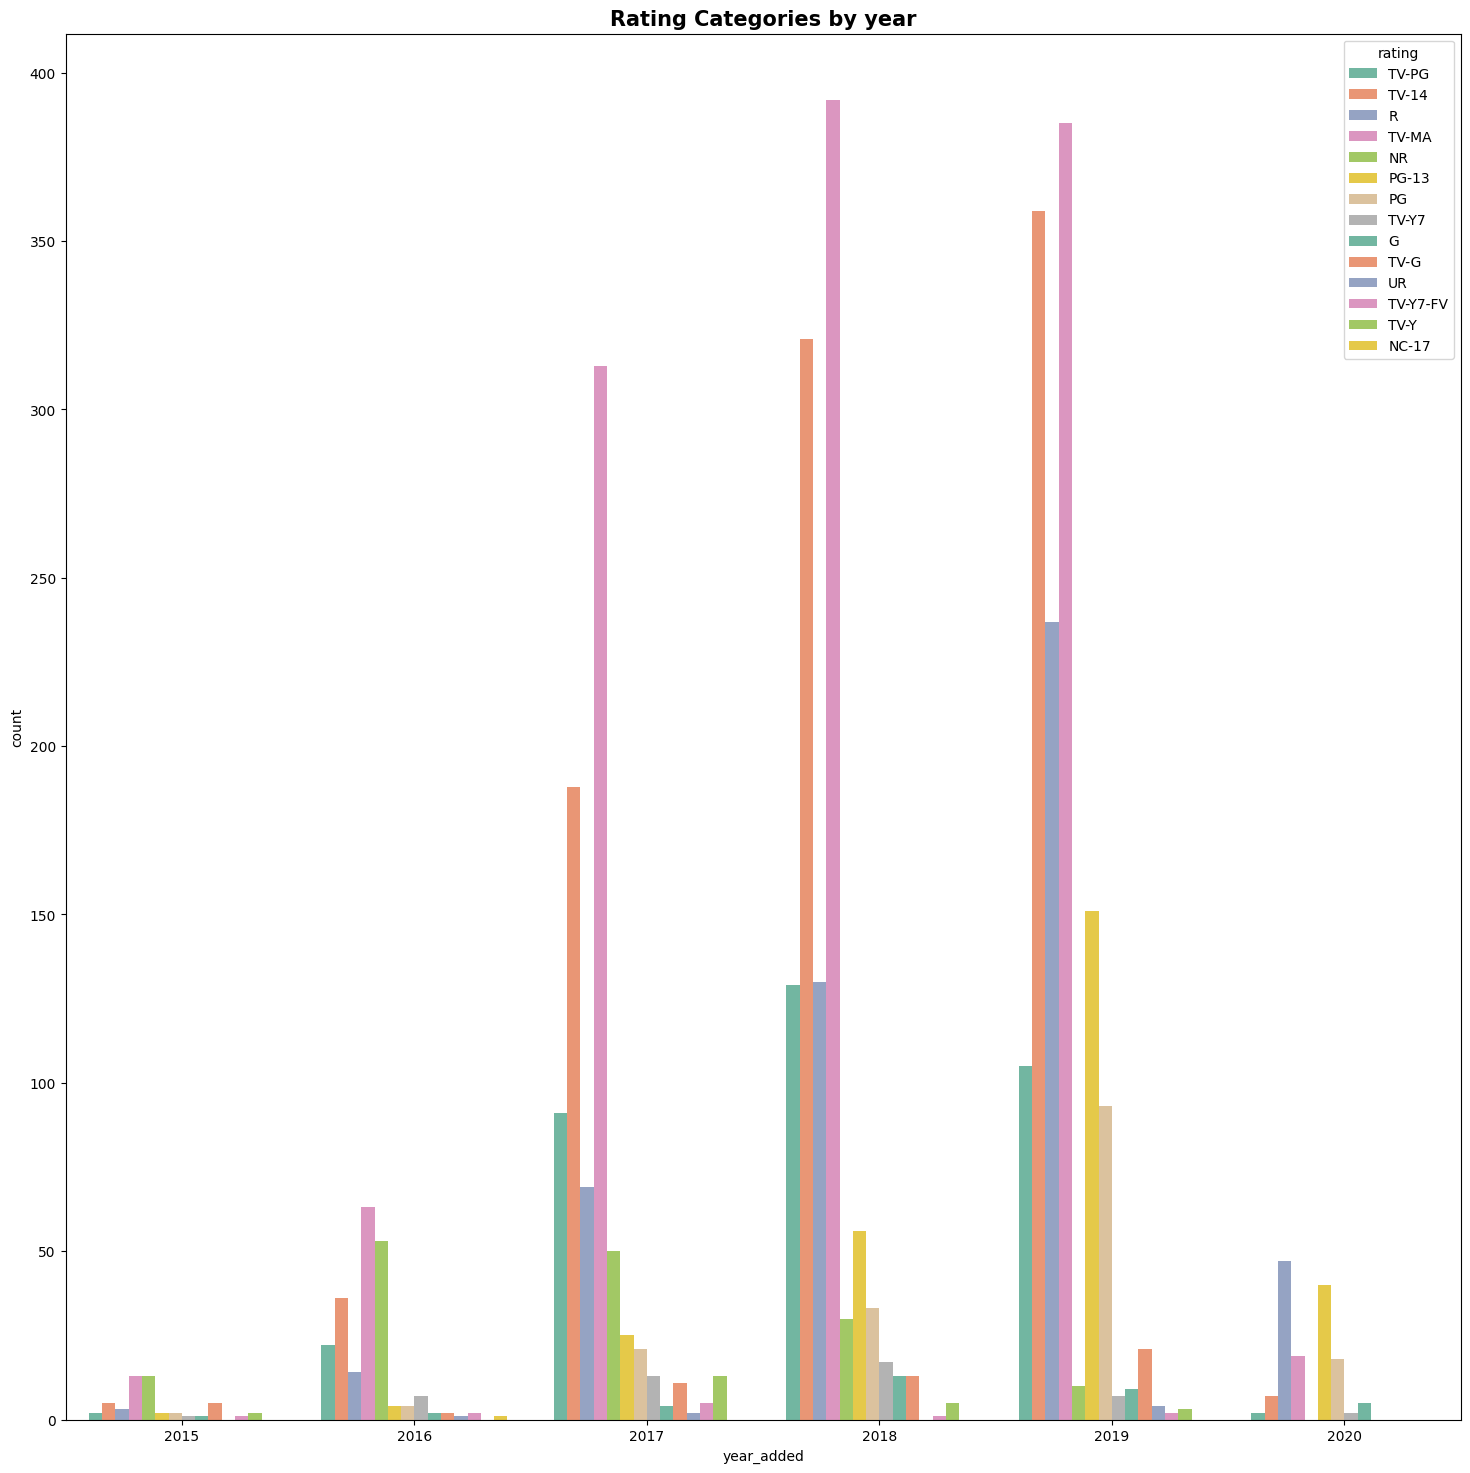

In [13]:
plt.figure(figsize=(18,18))

countplot_rating = sns.countplot(x='year_added', hue='rating', data=df[(df.year_added>=2015)], palette='Set2')
countplot_rating.set_title('Rating Categories by year', fontdict={'size': 15, 'weight': 'bold', 'multialignment':'center'})
plt.show()




<Figure size 2000x2000 with 0 Axes>

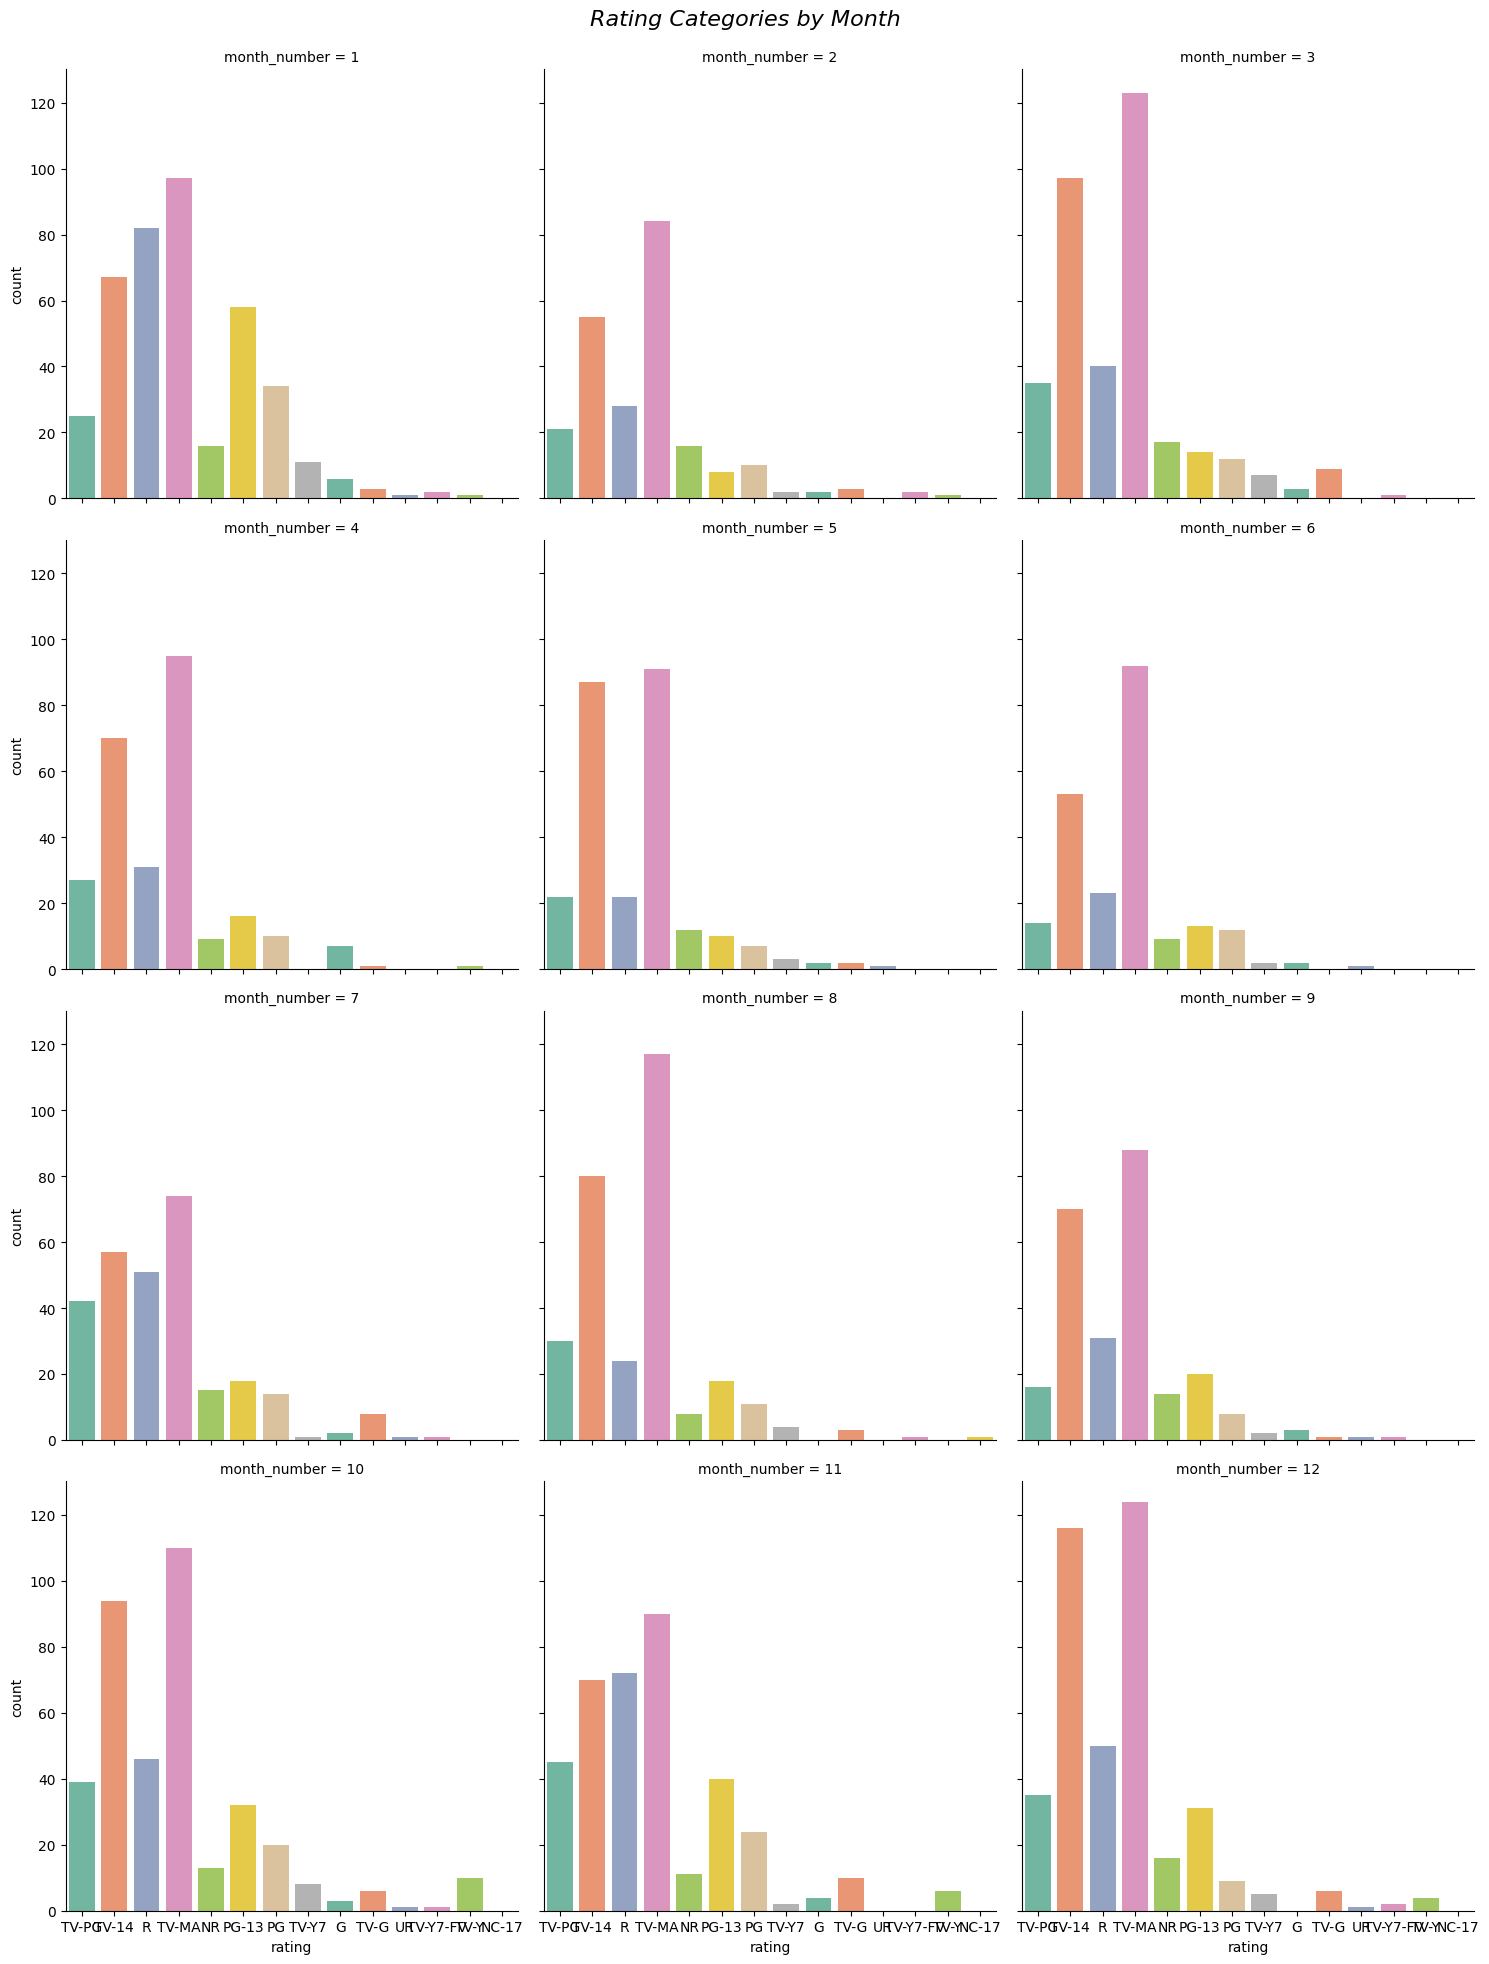

In [14]:
plt.figure(figsize=(20,20))
facetgrid_rating = sns.catplot(x="rating", col="month_number", data=df[(df.year_added>=2015)], col_wrap=3, kind="count",palette='Set2')
facetgrid_rating.fig.subplots_adjust(top=.95)
facetgrid_rating.fig.suptitle('Rating Categories by Month', style="oblique", fontsize=16)
plt.show()

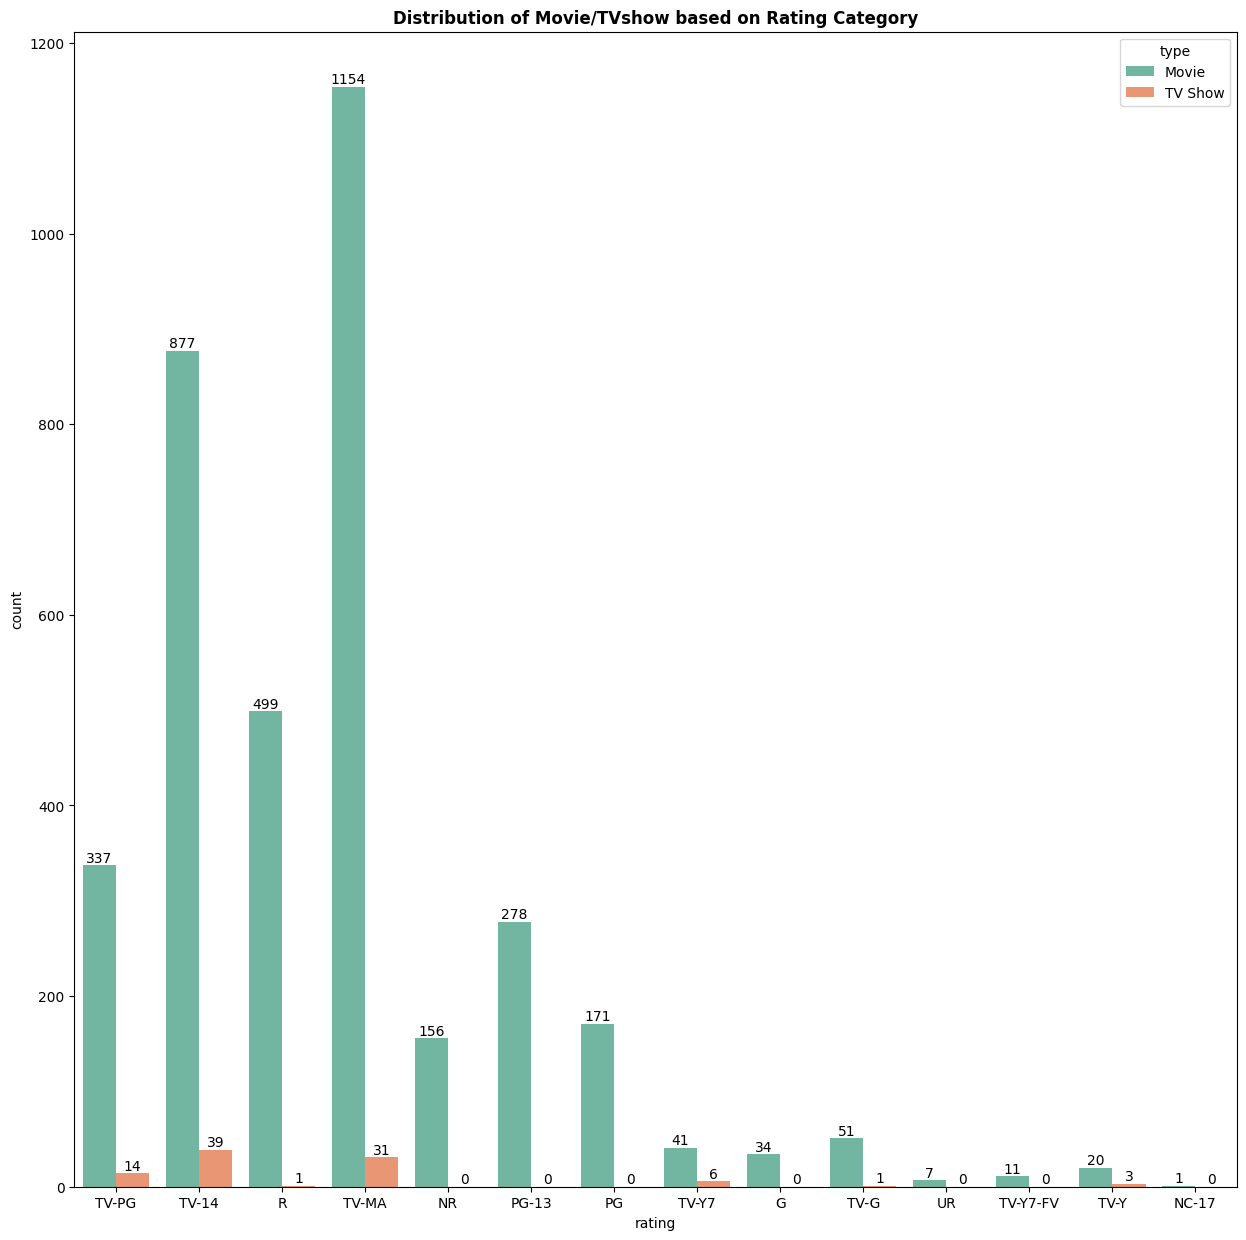

In [20]:
plt.figure(figsize=(15,15))
countplot_type_rating = sns.countplot(data=df[(df.year_added>=2015)], x='rating', hue='type', palette='Set2')
for container in countplot_type_rating.containers:
    countplot_type_rating.bar_label(container)

countplot_type_rating.set_title('Distribution of Movie/TVshow based on Rating Category', fontdict={'size': 12, 'weight': 'bold', 'multialignment':'center'})

plt.show()

from the first chart it is known that the maturity rating that dominated in 2015-2019 was TV-MA which is a Movie/TV show that Contains content that may be unsuitable for children. however, in 2020 the maturity rating that dominates is the R (Restricted) rating, which means that the film/TV show contains adult content for ages 17++. on the rating category chart every month, indeed in every month for the last five years, Movie/TV Show is dominated by the rating category TV-MA and followed by TV-14

If seen in the 3rd graph, the TV-MA category rating is dominated by Movies while for TV show types it is dominated by TV-14 category ratings.

-----------------------------------------------------------------------
3. what categories are most added on netflix?

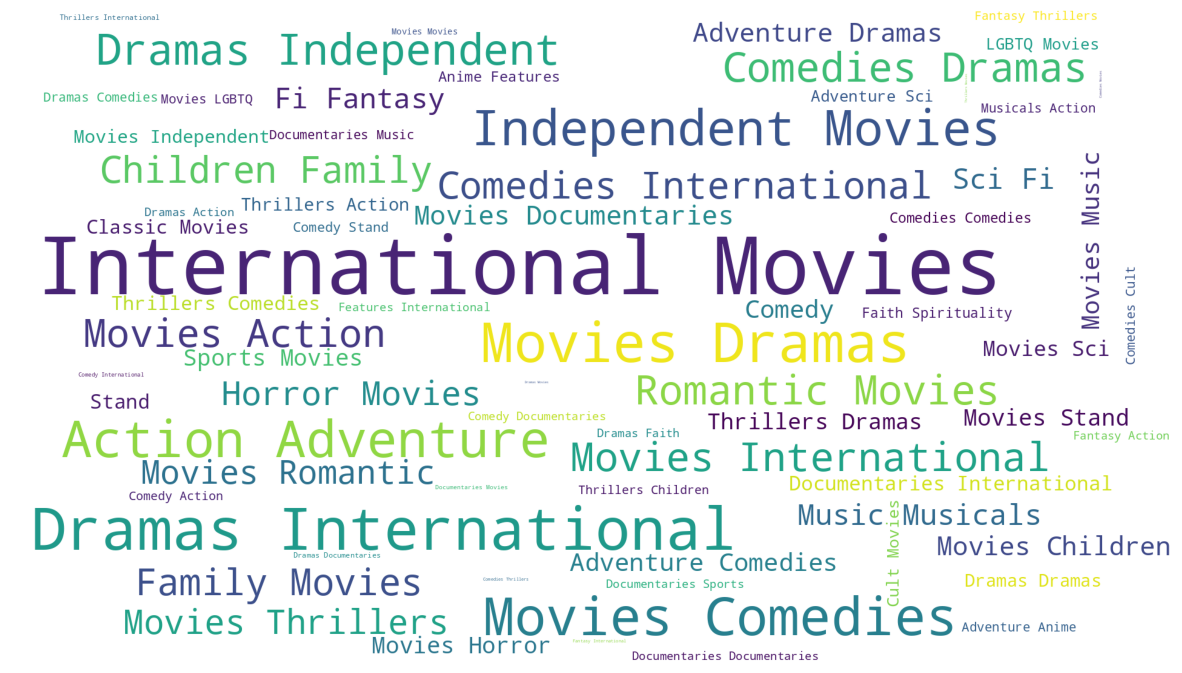

In [16]:
from wordcloud import WordCloud

data = df[(df.year_added>=2015)]
data_final = data[(data.type=="Movie")]

plt.subplots(figsize=(15,15))
wordcloud_category_movie = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data_final.listed_in))
plt.imshow(wordcloud_category_movie)
plt.axis('off')
plt.show()

Category International Movie merupakan category yang mendominasi movie yang terdapat pada netflix pada tahun 2015-2020

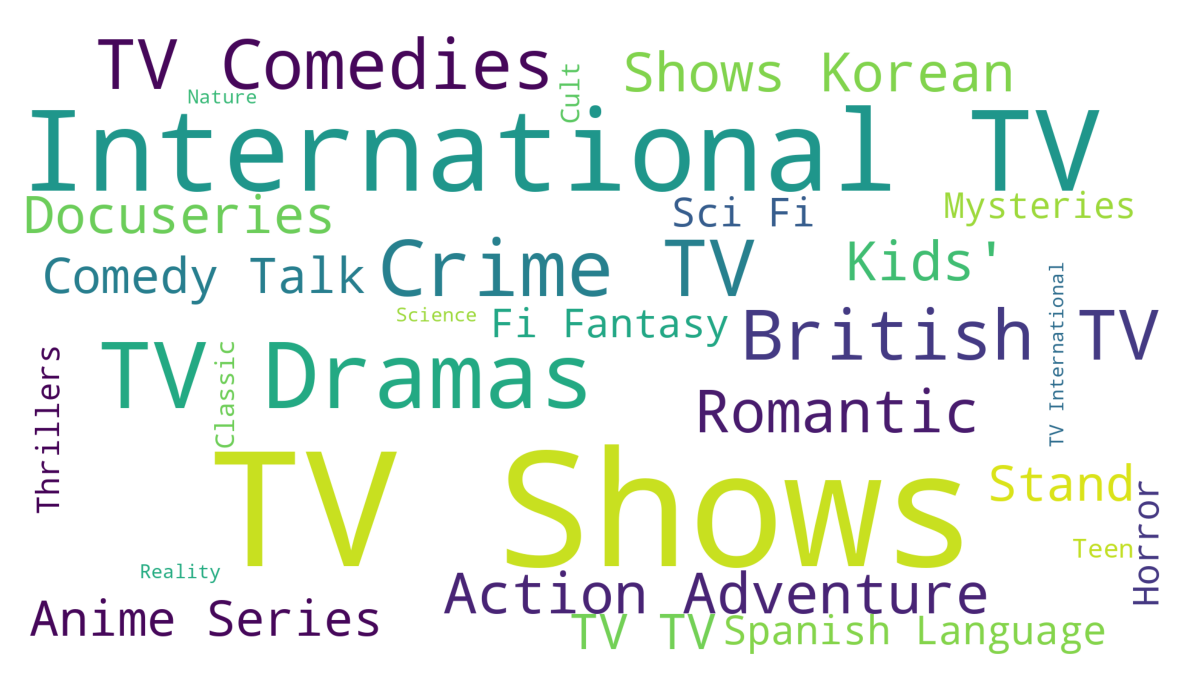

In [17]:
from wordcloud import WordCloud

data = df[(df.year_added>=2015)]
data_final = data[(data.type=="TV Show")]

plt.subplots(figsize=(15,15))
wordcloud_category_tv = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data_final.listed_in))
plt.imshow(wordcloud_category_tv)
plt.axis('off')
plt.show()

category TV Show sendiri merupakan kategori yang mendoominasi TV show yang terdapat pada netflix lalu disusul oleh TV Show dengan kategori International TV

--------------------------------------------------------------------------------
4. What country do the most movies/TV shows on Netflix come from?

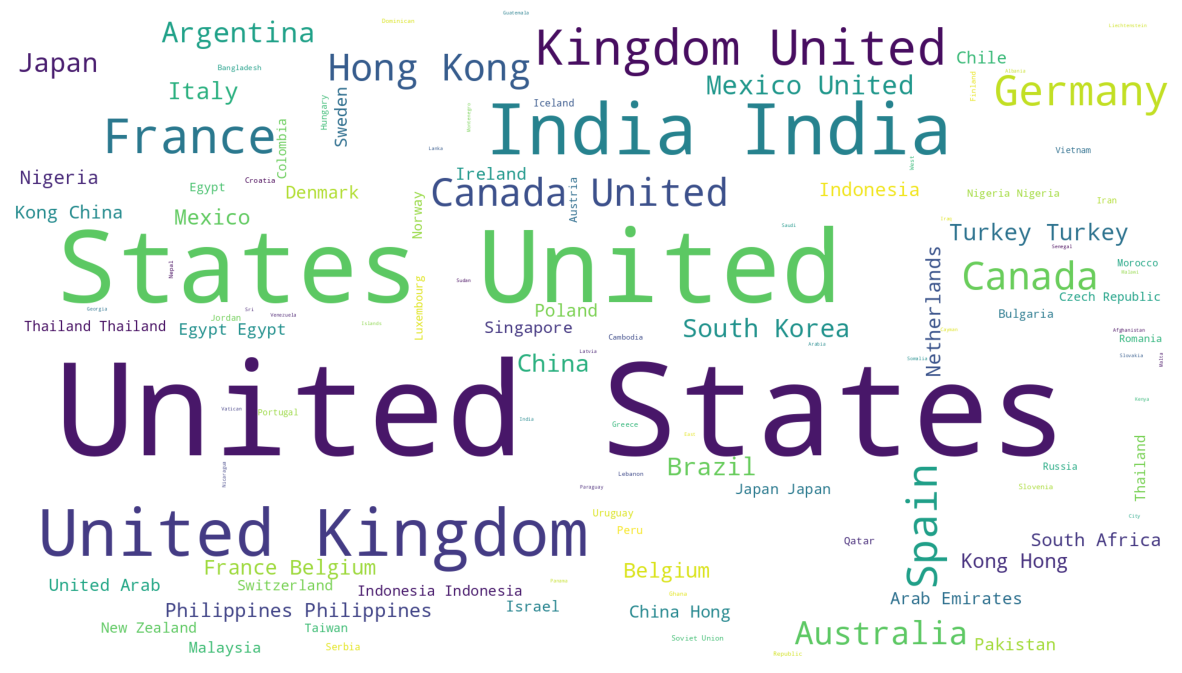

In [18]:
from wordcloud import WordCloud

data = df[(df.year_added>=2015)]
data_final = data[(data.type=="Movie")]

plt.subplots(figsize=(15,15))
wordcloud_country_movie = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data_final.country))
plt.imshow(wordcloud_country_movie)
plt.axis('off')
plt.show()

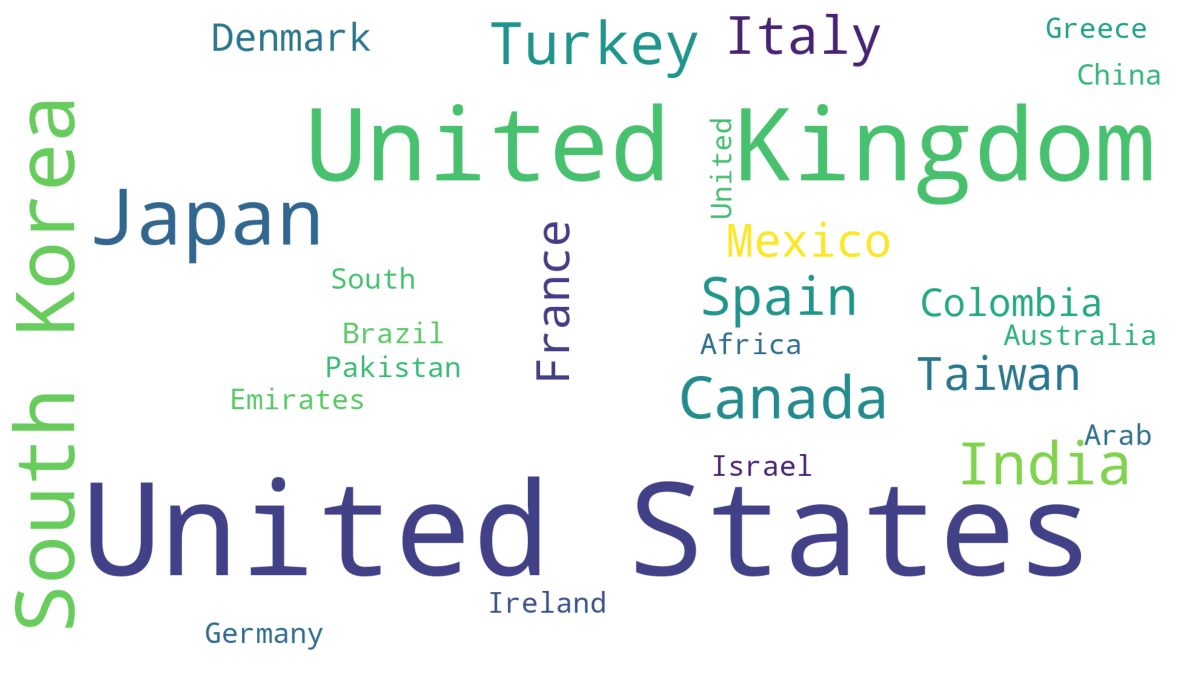

In [19]:
from wordcloud import WordCloud

data = df[(df.year_added>=2015)]
data_final = data[(data.type=="TV Show")]

plt.subplots(figsize=(15,15))
wordcloud_country_tv = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data_final.country))
plt.imshow(wordcloud_country_tv)
plt.axis('off')
plt.show()

United States merupakan negara dengan movie dan TV Show terbanyak pada netflix